# Análise Exploratória

A análise exploratória de dados (AED) é uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais, frequentemente com métodos visuais - [Wikipedia](https://pt.wikipedia.org/wiki/An%C3%A1lise_explorat%C3%B3ria_de_dados)

Dataset disponibilizado para uso por [Chris Moffitt](https://github.com/chris1610) em seu Github

## Importação das bibliotecas necessárias

In [1]:
import pandas_profiling as pp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import math

Para usar o [Plotly](https://plot.ly) precisamos nos cadastrar no site e obter uma chave API:

In [2]:
# Configuração da api com nome de usuário e chave de API, basta se cadastrar no site oficial do plotly, gerar uma chave API 
# criar um arquivo api_config.py salvo no mesmo diretório dos notebooks, contendo o import para a biblioteca abaixo e a seguinte linha abaixo preenchida com seu 
# usuário e a chave de API gerada:
# py.tools.set_credentials_file(username='x', api_key='x')

import api_config

## Leitura do dataset a ser utilizado

In [3]:
dataset = pd.read_excel('datasets/sample-sales.xlsx', encoding='UTF-8')

## Análise Exploratória dos dados

Vamos conhecer algumas informações sobre nosso dataset:

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
account number    1500 non-null int64
name              1500 non-null object
sku               1500 non-null object
quantity          1500 non-null int64
unit price        1500 non-null float64
ext price         1500 non-null float64
date              1500 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 82.1+ KB


Com esse comando, conseguimos visualizar quais as colunas disponíveis [ account number (número da conta), name (nome do comprador), sku (código identificador do produto), quantity (quantidade comprada), unit price (preço unitário), ext price (preço total = unitário * quantidade), date (data da compra)], os tipos de cada campo [int, object e float] e a memória utilizada na leitura/processamento do arquivo: (+ ou - 82.1KB)

## Correlação entre as colunas

Podemos agora verificar qual a correlação (influência de uma coluna em relação a outra) entre as colunas numéricas do dataset:

In [5]:
dataset.corr()

,account number,quantity,unit price,ext price
account number,1.000000,-0.007657,0.021886,-0.015722
quantity,-0.007657,1.000000,0.023267,0.739202
unit price,0.021886,0.023267,1.000000,0.597139
ext price,-0.015722,0.739202,0.597139,1.000000


Considerando as **melhores correlações** como valores **acima de 0.5** e as piores como valores **abaixo desse valor**, pode-se chegar as seguintes conclusões:
 - **Quantidade:** Possui uma grande correlação com o preço final da compra e uma pequena correlação com o preço unitário;
 - **Preço unitário:** Possui uma grande correlação com o preço final e uma pequena correlação como a quantidade.
 - **Preço final:** Possui grandes correlações com o preço unitário e a quantidade aquirida <br>
 
Podemos observar melhor essas correlações em forma de gráfico, através de um heatmap:

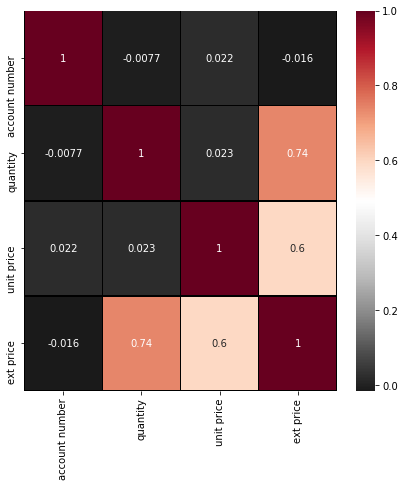

In [6]:
%matplotlib inline

plt.figure(figsize=(7,7))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='RdGy_r')
plt.xticks(rotation=90)
plt.show()

Agora podemos representar algumas colunas (as de maior correlação, por exemplo), comparando-as através de gráficos de dispersão para entender qual a relação entre duas variáveis. <br> **Exemplo:** Se x aumenta a medida que y aumenta, se o valor de x reduz a medida em que y aumenta, dentre outras possíveis interpretações.

**OBS:** Antes de representar esses dados, vamos validar se a quantidade, o valor total e o valor unitário são valores positivos e maiores que zero:

In [7]:
# Pesquisar por valores vazios ou negativos
qtd = (dataset.filter(like='quantity').sum(axis=1) <= 0).sum()
preco_unit = (dataset.filter(like='unit price').sum(axis=1) <= 0).sum()
total = (dataset.filter(like='ext price').sum(axis=1) <= 0).sum()

print('Quantidade de registros com a coluna quantidade zerada/negativa: {}'.format(qtd))
print('Quantidade de registros com a coluna preço unitário zerada/negativa: {}'.format(preco_unit))
print('Quantidade de registros com a coluna preço unitário zerada/negativa: {}'.format(total))

Quantidade de registros com a coluna quantidade zerada/negativa: 28
Quantidade de registros com a coluna preço unitário zerada/negativa: 0
Quantidade de registros com a coluna preço unitário zerada/negativa: 28


Encontramos valores negativos e precisamos removê-los para não prejudicar nossos gráficos/análises, pois não fza sentido nesse caso considerar compras com valores zerados/negativos:

In [8]:
dataset = dataset.loc[(dataset['quantity'] > 0) & (dataset['unit price'] > 0)  & (dataset['ext price'] > 0)]

### Relação entre quantidade e preço total

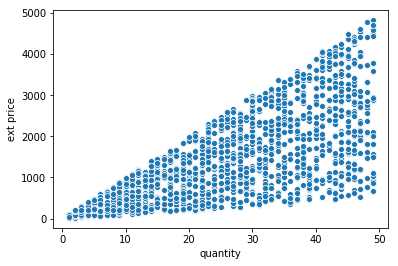

In [9]:
sns.scatterplot(x="quantity", y="ext price", data=dataset)

Observa-se bem nitidamente que a medida que a quantidade comprada aumenta, o preço total a pagar se torna cada vez maior.

### Relação entre preço unitário e preço total

In [10]:
# Configurando as cores para a plotagem
# Código fornecido pelo próprio Plotly em seus exemplos: https://plot.ly/python/line-and-scatter/

# Vamos trabalhar aqui com somente 100 registros para ter uma boa visualização
data_plot = dataset[:100]

l= []
y= []
N= 53
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

for i in range(int(N)):
    y.append((2000+i))
    trace0= go.Scatter(
        x= data_plot['unit price'],
        y= data_plot['ext price'],
        mode= 'markers',
        marker= dict(size= 14,
                    line= dict(width=1),
                    color= c[i],
                    opacity= 0.3
                   ),name= y[i],
        text= data_plot['ext price']) # Texto que aparece ao posicionar o cursor do mouse
    l.append(trace0);

layout= go.Layout(
    title= 'Preço unitário x Preço Total',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Preço unitário',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Preço total',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l, layout=layout)
iplot(fig)

Pode-se concluir que na maioria dos registros, quanto maior for o valor unitário do produto, o valor total possui a tendência de ser maior.

Podemos visualizar também essa distribuição de valores em formato de histograma. Vamos visualizara distribuição dos preços a ser pagos pelos clientes:

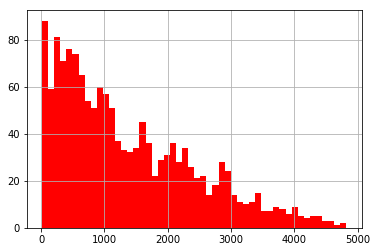

In [11]:
# Plota um Histograma(distribuição de valores) com os valores totais na cor vermelho (bins = agrupamento de dados/ quantidade de barras vermelhas - 50 por grupo)
%matplotlib inline
dataset['ext price'].hist(bins=50, color='red')

Nesse histograma, podemos perceber que a maioria dos valores totais a serem pagos se encontram acima de 1000 reais.

Podemos validar essa informação quantificando os valores de 0-1000 e maiores que 1000:

In [12]:
df = dataset['ext price']
abaixo_1000 = df[df <= 1000].count()
acima_1000 = df[df > 1000].count()
print('Qtd. de valores até 1000 reais: {}'.format(abaixo_1000))
print('Qtd. de valores acima de 1000 reais: {}'.format(acima_1000))

Qtd. de valores até 1000 reais: 689
Qtd. de valores acima de 1000 reais: 783


## Relatório de Análise Exploratória com o pandas_profiling

Vamos visualizar agora algumas informações sobre esse dataset com o pandas_profiling que facilita todo o processo de obter informações sobre o dataset:

In [13]:
pp.ProfileReport(dataset)

Number of variables,8
Number of observations,1472
Total Missing (%),0.0%
Total size in memory,92.1 KiB
Average record size in memory,64.1 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),1
Rejected,0
